Contorno 1: Perímetro=8.00, Área=4.00, Vértices=4, Forma=Cuadrado
Contorno 2: Perímetro=106.08, Área=98.00, Vértices=12, Forma=Círculo
Contorno 3: Perímetro=9.07, Área=5.50, Vértices=6, Forma=Hexágono
Contorno 4: Perímetro=18.14, Área=9.00, Vértices=6, Forma=Hexágono
Contorno 5: Perímetro=600.36, Área=664.00, Vértices=7, Forma=Círculo
Contorno 6: Perímetro=579.63, Área=751.50, Vértices=8, Forma=Círculo
Contorno 7: Perímetro=179.34, Área=221.00, Vértices=13, Forma=Círculo
Contorno 8: Perímetro=408.92, Área=388.50, Vértices=12, Forma=Círculo
Contorno 9: Perímetro=482.42, Área=404.00, Vértices=6, Forma=Hexágono
Contorno 10: Perímetro=179.34, Área=221.00, Vértices=13, Forma=Círculo
Contorno 11: Perímetro=493.93, Área=589.00, Vértices=8, Forma=Círculo
Contorno 12: Perímetro=347.07, Área=7550.50, Vértices=4, Forma=Rectángulo
Contorno 13: Perímetro=477.07, Área=14264.50, Vértices=4, Forma=Rectángulo
Contorno 14: Perímetro=485.89, Área=10297.50, Vértices=3, Forma=Triángulo
Contorno 15: Perímet

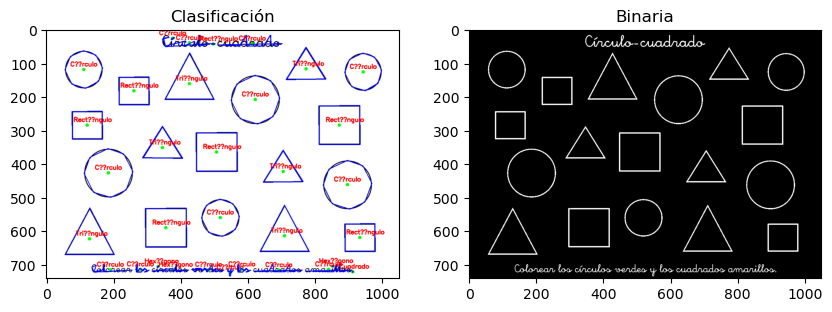

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('fig.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, bin = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

contornos, jerarquia = cv2.findContours(bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i, cnt in enumerate(contornos):
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    cv2.circle(image, (cx, cy), 5, (0, 255, 0), -1)

    area = cv2.contourArea(cnt)
    perimetro = cv2.arcLength(cnt, True)

    epsilon = 0.02 * perimetro
    approx = cv2.approxPolyDP(cnt, epsilon, True)

    vertices = len(approx)
    if vertices == 3:
        forma = "Triángulo"
    elif vertices == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        forma = "Cuadrado" if 0.95 < aspect_ratio < 1.05 else "Rectángulo"
    elif vertices == 5:
        forma = "Pentágono"
    elif vertices == 6:
        forma = "Hexágono"
    elif vertices > 6:
        forma = "Círculo"
    else:
        forma = f"{vertices} lados"

    hu = cv2.HuMoments(M).flatten()

    cv2.drawContours(image, [approx], -1, (255, 0, 0), 2)
    cv2.putText(image, forma, (cx - 40, cy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    print(f'Contorno {i+1}: Perímetro={perimetro:.2f}, Área={area:.2f}, Vértices={vertices}, Forma={forma}')

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Clasificación")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.title("Binaria")
plt.imshow(bin, cmap='gray')
plt.show()

Contorno 1: Perímetro=8.00, Área=4.00, Forma=Cuadrado, Momentos de Hu=[ 1.66666667e-01  2.11758237e-22  1.34521114e-15  1.40174551e-15
  1.41085712e-30 -9.43072119e-27 -1.30941417e-30]
Contorno 2: Perímetro=106.08, Área=98.00, Forma=Círculo, Momentos de Hu=[ 5.32165240e-01  5.54353677e-02  7.14143349e-02  1.05443902e-02
  1.42960186e-04  1.71325991e-03 -2.51567791e-04]
Contorno 3: Perímetro=9.07, Área=5.50, Forma=Otro, Momentos de Hu=[ 1.70464980e-01  2.22461963e-03  2.28946818e-04  9.06947738e-06
 -4.13276489e-10 -4.27769824e-07  1.27578732e-15]
Contorno 4: Perímetro=18.14, Área=9.00, Forma=Otro, Momentos de Hu=[5.43552812e-01 2.59283368e-01 3.42373359e-03 2.41354585e-03
 6.91824924e-06 1.14638624e-03 5.22927479e-07]
Contorno 5: Perímetro=600.36, Área=664.00, Forma=Círculo, Momentos de Hu=[ 2.50431912  5.87352479  1.32295601  1.03008567  1.20246727  2.48105949
 -0.00793631]
Contorno 6: Perímetro=579.63, Área=751.50, Forma=Círculo, Momentos de Hu=[ 1.83853800e+00  3.24751558e+00  1.055

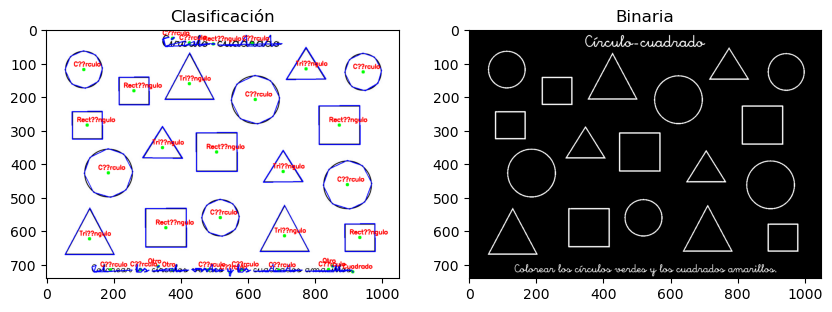

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('fig.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, bin = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

contornos, jerarquia = cv2.findContours(bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i, cnt in enumerate(contornos):
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    cv2.circle(image, (cx, cy), 5, (0, 255, 0), -1)

    area = cv2.contourArea(cnt)
    perimetro = cv2.arcLength(cnt, True)

    epsilon = 0.02 * perimetro
    approx = cv2.approxPolyDP(cnt, epsilon, True)

    vertices = len(approx)
    if vertices == 3:
        forma = "Triángulo"
    elif vertices == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        forma = "Cuadrado" if 0.95 < aspect_ratio < 1.05 else "Rectángulo"
    elif vertices > 6:
        forma = "Círculo"
    else:
        forma = "Otro"

    hu = cv2.HuMoments(M).flatten()

    cv2.drawContours(image, [approx], -1, (255, 0, 0), 2)
    cv2.putText(image, forma, (cx - 30, cy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    print(f'Contorno {i+1}: Perímetro={perimetro:.2f}, Área={area:.2f}, Forma={forma}, Momentos de Hu={hu}')

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Clasificación")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.title("Binaria")
plt.imshow(bin, cmap='gray')
plt.show()

Contorno 1:
  Forma      = Cuadrado
  Vértices   = 4
  Perímetro = 0.21 cm
  Área      = 0.00 cm²
  Momentos de Hu:
    Hu[0] = 1.66667e-01
    Hu[1] = 2.11758e-22
    Hu[2] = 1.34521e-15
    Hu[3] = 1.40175e-15
    Hu[4] = 1.41086e-30
    Hu[5] = -9.43072e-27
    Hu[6] = -1.30941e-30

Contorno 2:
  Forma      = Círculo
  Vértices   = 12
  Perímetro = 2.81 cm
  Área      = 0.07 cm²
  Momentos de Hu:
    Hu[0] = 5.32165e-01
    Hu[1] = 5.54354e-02
    Hu[2] = 7.14143e-02
    Hu[3] = 1.05444e-02
    Hu[4] = 1.42960e-04
    Hu[5] = 1.71326e-03
    Hu[6] = -2.51568e-04

Contorno 3:
  Forma      = Hexágono
  Vértices   = 6
  Perímetro = 0.24 cm
  Área      = 0.00 cm²
  Momentos de Hu:
    Hu[0] = 1.70465e-01
    Hu[1] = 2.22462e-03
    Hu[2] = 2.28947e-04
    Hu[3] = 9.06948e-06
    Hu[4] = -4.13276e-10
    Hu[5] = -4.27770e-07
    Hu[6] = 1.27579e-15

Contorno 4:
  Forma      = Hexágono
  Vértices   = 6
  Perímetro = 0.48 cm
  Área      = 0.01 cm²
  Momentos de Hu:
    Hu[0] = 5.43553e-01


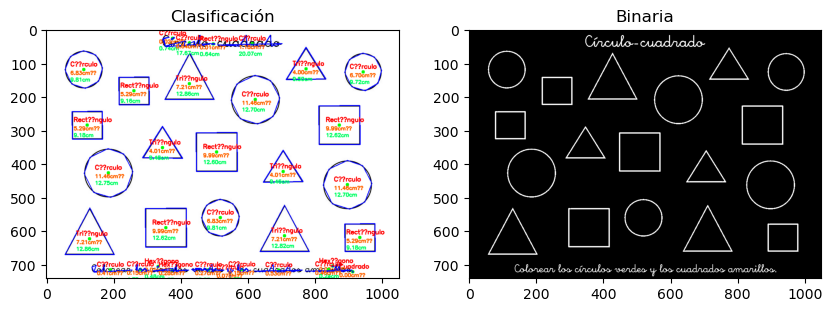

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


px_por_cm = 37.79  

image = cv2.imread('fig.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, bin = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

contornos, jerarquia = cv2.findContours(bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i, cnt in enumerate(contornos):
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    cv2.circle(image, (cx, cy), 5, (0, 255, 0), -1)

    area_px = cv2.contourArea(cnt)
    perimetro_px = cv2.arcLength(cnt, True)

    area_cm = area_px / (px_por_cm ** 2)
    perimetro_cm = perimetro_px / px_por_cm

    epsilon = 0.02 * perimetro_px
    approx = cv2.approxPolyDP(cnt, epsilon, True)

    vertices = len(approx)
    if vertices == 3:
        forma = "Triángulo"
    elif vertices == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        forma = "Cuadrado" if 0.95 < aspect_ratio < 1.05 else "Rectángulo"
    elif vertices == 5:
        forma = "Pentágono"
    elif vertices == 6:
        forma = "Hexágono"
    elif vertices > 6:
        forma = "Círculo"
    else:
        forma = f"{vertices} lados"

    hu = cv2.HuMoments(M).flatten()

    cv2.drawContours(image, [approx], -1, (255, 0, 0), 2)
    cv2.putText(image, f"{forma}", (cx - 40, cy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.putText(image, f"{area_cm:.2f}cm²", (cx - 40, cy + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 100, 255), 2)
    cv2.putText(image, f"{perimetro_cm:.2f}cm", (cx - 40, cy + 35), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (100, 255, 0), 2)

 
    print(f'Contorno {i+1}:')
    print(f'  Forma      = {forma}')
    print(f'  Vértices   = {vertices}')
    print(f'  Perímetro = {perimetro_cm:.2f} cm')
    print(f'  Área      = {area_cm:.2f} cm²')
    print('  Momentos de Hu:')
    for j, hu_val in enumerate(hu):
        print(f'    Hu[{j}] = {hu_val:.5e}')
    print()

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Clasificación")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.title("Binaria")
plt.imshow(bin, cmap='gray')
plt.show()
